# What happened earlier ...
1. The features and the label were selected
1. The features were scaled (by standardizing them to a mean of 0 and std. deviation of 1)
1. Some of the data was used to test the selected classification model (linear regression)
1. After the training was done, the model was tested by applying it on the rest of the data
1. The predicted values were saved into the dataframe and visualized
1. Serialization: saving the classifier once it is trained to reload it when necessary without the need of retraining
1. Linear Regression as a classification model: fitting a line to data points

## New
### Testing the made assumptions
How can we test the linear regression model for correctness? </br> 
- By applying the model on different datasets and data distributions we can understand how the model responds.
- We can change several features like the variance or the step value and look if the regression line acts as expected. 
- The slope, y-intercept and the coefficient of determination help us to identify discrepancies. 
- But the problem is to know what to expect. Visualisations and knowledge about the underlying problem can help to get some idea of the expected outcome.
- additional testing methods: outlier testing, cross-validation, comparison with other models, statistical significance, predicitive testing

Slope (m): 1.82
Y-intercept (b): 1.03
Coefficient of Determination (r^2): 0.7783


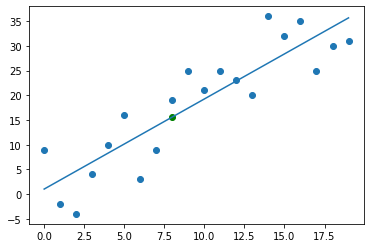

In [50]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

#xs = np.array([1,2,3,4,5,6], dtype=np.float64)
#ys = np.array([5,4,6,5,6,7], dtype=np.float64)

# create a dataset with random data points
def create_dataset(hm, variance, step=2, correlation=False):
    # create a starting value and a list for the y data
    val = 1
    ys = []
    
    # iterate over the user-specified number of y data and create random numbers
    for i in range(hm):
        # create y values in the range of the specified variance
        y = val + random.randrange(-variance, variance)
        
        # append the created y values to the list
        ys.append(y)
        
        # if a correlation is specified and predefined as positive or negative, 
        # the starting value should be increased or decreased continuously
        if correlation == 'pos':
            val += step
        elif correlation == 'neg':
            val -= step
    
    # create a list with x data according to the number of y values 
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    numerator = mean(xs) * mean(ys) - mean(xs*ys)
    denominator = mean(xs)**2 - mean(xs**2)
    m = numerator / denominator
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig, ys_line):
    squared_error = sum((ys_line-ys_orig)**2)
    return squared_error

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    r_squared = 1 - (squared_error_regr / squared_error_y_mean)
    return r_squared

# create a dataset with 20 data points, a variance of +- 10, a y-step of 2 and a positive correlation
xs, ys = create_dataset(20, 10, 2, correlation='pos')

m, b = best_fit_slope_and_intercept(xs,ys)

regression_line = [ m*x + b for x in xs ]

r_squared = coefficient_of_determination(ys, regression_line)

print("Slope (m): %.2f" % m)
print("Y-intercept (b): %.2f" % b)
print("Coefficient of Determination (r^2): %.4f" % r_squared)

predict_x = 8
predict_y = (m*predict_x) + b

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x, predict_y, color='g')
plt.show()
